<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 5#  
**Matt Rice**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
# imports for voting bagging random forest and ada boost classifiers
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
# load landsat train into dataframe
landsat_train = pd.read_csv('/content/drive/MyDrive/CS430/MLA/MLA5/landsat_train.csv')
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [9]:
# load landsat test into dataframe
landsat_test = pd.read_csv('/content/drive/MyDrive/CS430/MLA/MLA5/landsat_test.csv')
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


### Statistical and Visual Exploration

In [10]:
# Get the counts of land types and store them in a dataframe
land_type_train = pd.DataFrame(landsat_train['land_type'].value_counts())
land_type_train.head()

,count
land_type,
1,1072
7,1038
3,961
2,479
5,470


In [11]:
# Get the counts of land types and store them in a dataframe
land_type_test = pd.DataFrame(landsat_test['land_type'].value_counts())
land_type_test.head()

,count
land_type,
7,470
1,461
3,397
5,237
2,224


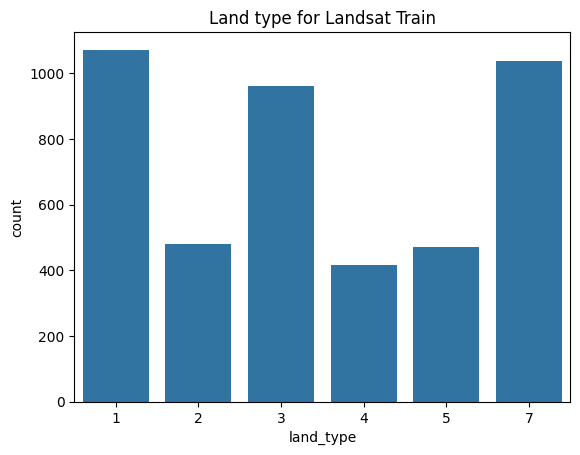

<Figure size 1000x500 with 0 Axes>

In [12]:
# bar plot for land type of landsat train
sns.barplot(x='land_type', y='count', data=land_type_train)
plt.title('Land type for Landsat Train')
plt.figure(figsize=(10,5))

plt.show()

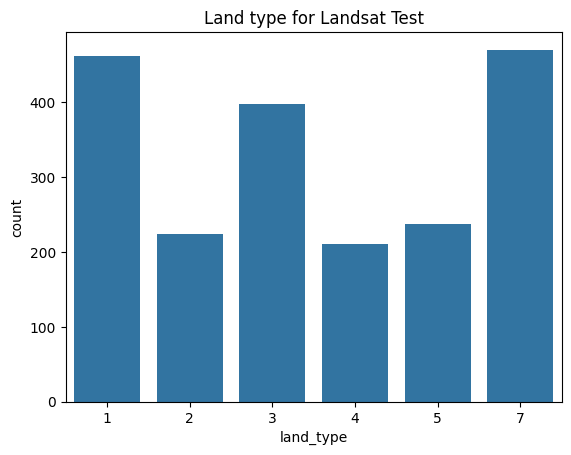

<Figure size 1000x500 with 0 Axes>

In [13]:
# bar plot for land type of landsat test
sns.barplot(x='land_type', y='count', data=land_type_test)
plt.title('Land type for Landsat Test')
plt.figure(figsize=(10,5))

plt.show()

There are significantly more instances of 1, 7, and 3 so I believe they will end up performing better than 4 or other types with smaller instances.

### Splitting Data into Train/Test

In [14]:
# split into X_train, and X_test and y_train and y_test with x dropping land type and y only land type
X_train = landsat_train.drop(['land_type'], axis=1)
y_train = landsat_train['land_type']

X_test = landsat_test.drop(['land_type'], axis=1)
y_test = landsat_test['land_type']


### Building the Pipeline

In [15]:
numerical_features = X_train.select_dtypes(include=['number']).columns

In [16]:
# Create column transformer to minmax scale the columns
# Create a column trasformer to MinMax Scale
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Create preprocessor for data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ])

In [17]:
# Create pipeline to fit the Random Forest classifier
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', RandomForestClassifier())])

### Executing the Model

In [18]:
# fit the model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.99      0.98       224
           3       0.89      0.95      0.92       397
           4       0.78      0.64      0.70       211
           5       0.93      0.90      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



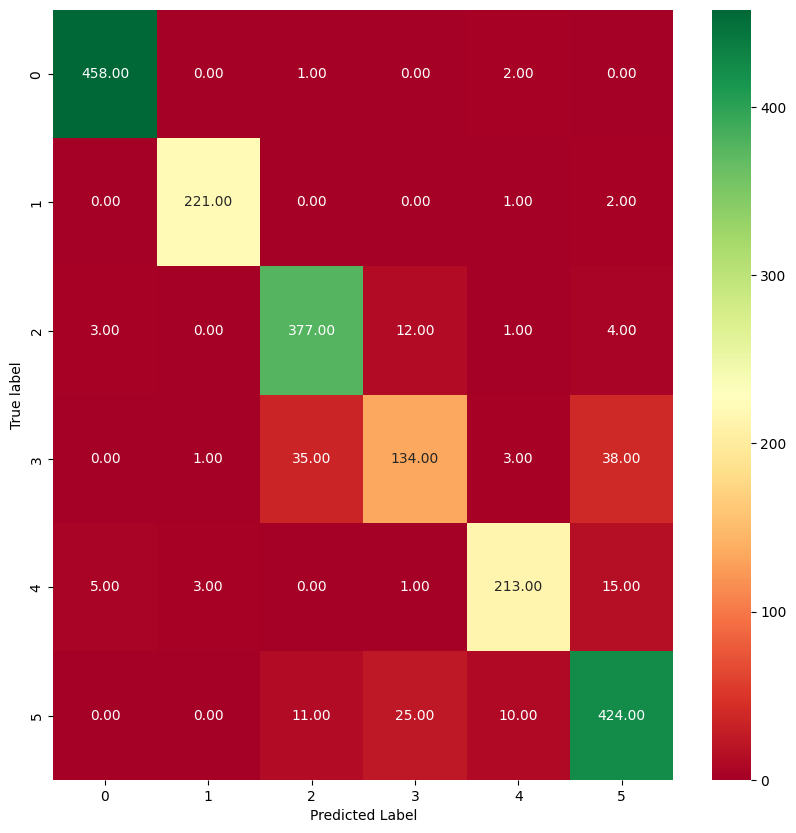

In [19]:
# plot cm and calculate precision, recall, and f1 score
y_pred = rf_pipe.predict(X_test)
plot_cm(y_test, y_pred)

# use classification function to display precision, recall and f1 for each class
print(classification_report(y_test, y_pred))


It performs really well except for on 4 which it still performs decently on.

### Conclusion

This model performs well with high recall, precision, and f1 scores for most classes aside from land type 4 which had scores in the 70's and 60's. This means that it is good at predicting true positives and true negatives for all classes, but struggles a little more with land type 4. It is a good model for predicting land types.

## Problem 2

### Reading the Data

Already read

### Splitting Data into Train/Test

Already split

### Building the Pipeline

In [20]:
# Create pipeline for AdaBoosting
boost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', AdaBoostClassifier(algorithm='SAMME', n_estimators=100))])

### Executing the Model

In [21]:
boost_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=100))])

### Evaluating Model

              precision    recall  f1-score   support

           1       0.91      0.88      0.89       461
           2       0.98      0.92      0.95       224
           3       0.88      0.93      0.90       397
           4       0.41      0.34      0.37       211
           5       0.54      0.74      0.63       237
           7       0.70      0.64      0.66       470

    accuracy                           0.76      2000
   macro avg       0.74      0.74      0.73      2000
weighted avg       0.76      0.76      0.76      2000



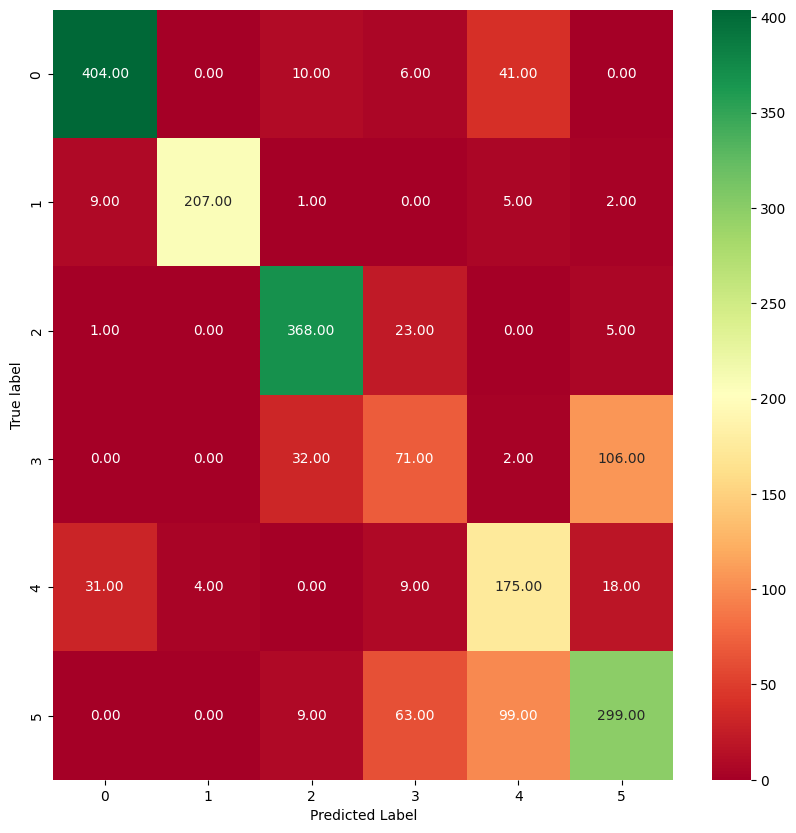

In [22]:
# plot cm and calculate precision, recall, and f1 score
y_pred = boost_pipe.predict(X_test)
plot_cm(y_test, y_pred)

# use classification function to display precision, recall and f1 for each class
print(classification_report(y_test, y_pred))

It performs well for most values, but is noticably worse than random forest.

### Conclusion
This model is okay at predicting the land types. It has excellent scores for predicting 1, 2, and 3 with very few incorrect predictions. It does struggle with 4, 5, and 7 and performs worse than the random forest classifier with these current parameters. I do not think it is an adequate model unless you are only searching for the first 3 land types.

## Problem 3

### Reading the data

In [23]:
# Read banknote authorization data
df = pd.read_csv('/content/drive/MyDrive/CS430/MLA/MLA5/banknote_authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Statistical and visual exploration

In [24]:
# Summarize the numerical columns
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [25]:
# Get the counts of forgery vs no forgery and store them in a dataframe
forgery_df = pd.DataFrame(df['forgery'].value_counts())
forgery_df.head()

,count
forgery,
0,762
1,610


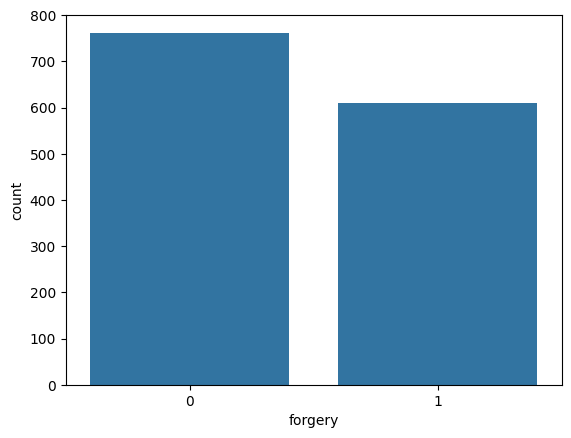

<Figure size 1000x500 with 0 Axes>

In [26]:
# Create barplot of forgery_df
sns.barplot(x='forgery', y='count', data=forgery_df)
plt.figure(figsize=(10,5))
plt.show()

There are more non forgeries than forgeries, but likely not enough to imbalance the data significantly enough to affect predictions.

### Split into train/test

In [27]:
# Split into Input and Target
X = df.drop('forgery', axis=1)
y = df['forgery']

In [28]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the pipeline

In [29]:
numerical_features = X.select_dtypes(include=['number']).columns

In [30]:
# Create a column trasformer to MinMax Scale
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Create preprocessor for data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ])

In [31]:
# Create pipeline to transform the data and run random forest calssification
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

### Executing the model

In [32]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating the model

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



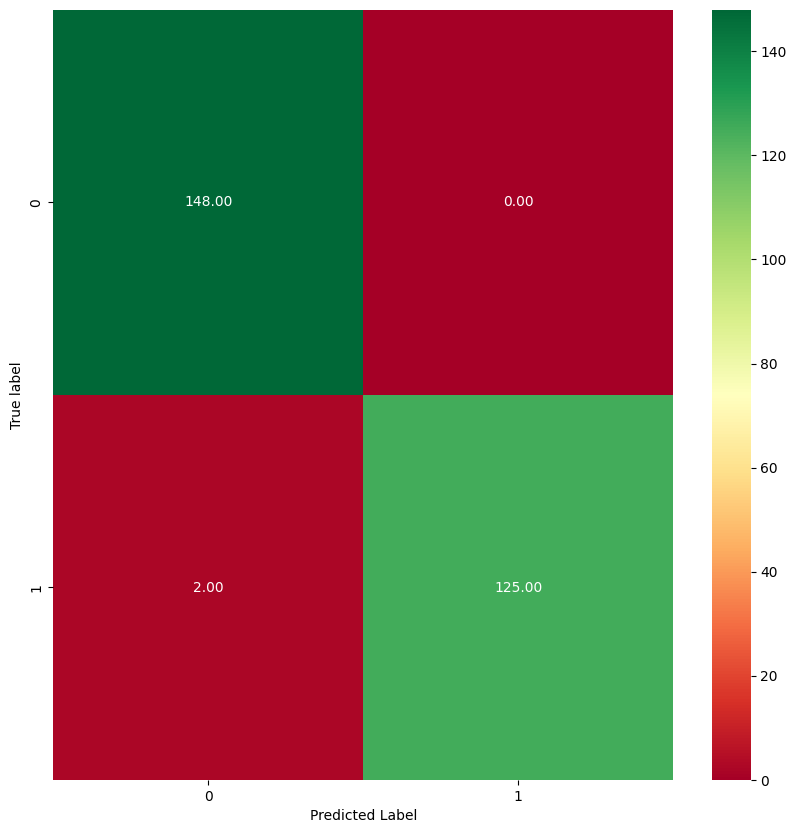

In [33]:
# plot cm and calculate precision, recall, and f1 score
y_pred = rf_pipeline.predict(X_test)
plot_cm(y_test, y_pred)

# use classification function to display precision, recall and f1 for each class
print(classification_report(y_test, y_pred))


### Conclusion

This model is nearly perfect at predicting forgeries. All of its scores are nearly perfect or perfect. This model has very little room for improvement because it is nearly perfect. It only predicted two forgeries incorrectly, which is really good. It performed better than the SVC model on the same dataset.